In [1]:
import pickle
import matplotlib.pyplot as plt

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 


%load_ext autoreload
%autoreload 2

import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
from plot_funcs import *
import modules

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hp/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
p231, p222_1, p222_2, p222_3, p201_1, p201_2, p229 = modules.build_patients()
pat_list = [p231, p222_1, p222_2, p222_3, p201_2, p229]
for pat in pat_list:
    JJ.save_object(pat, '../patients/' + pat.id +'.p')

/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


231
222_1
222_2
222_3
201_2
229


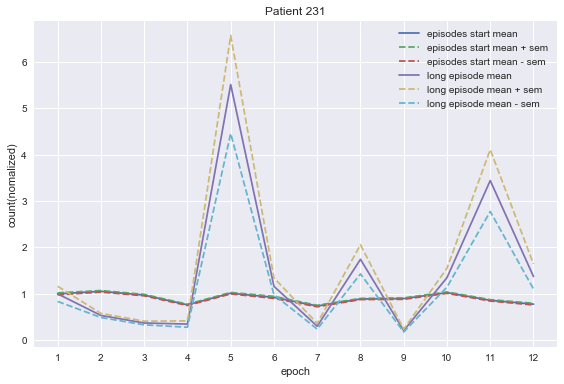

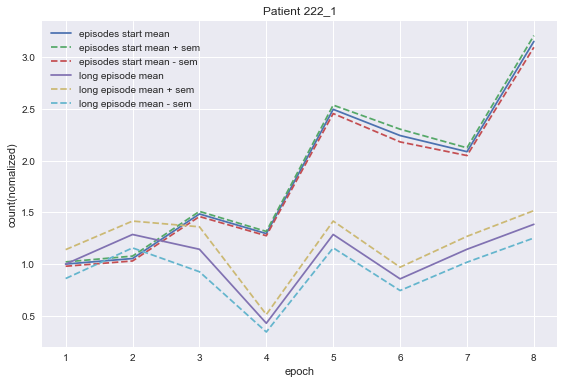

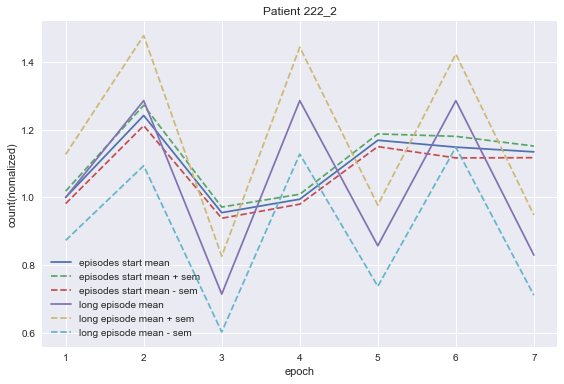

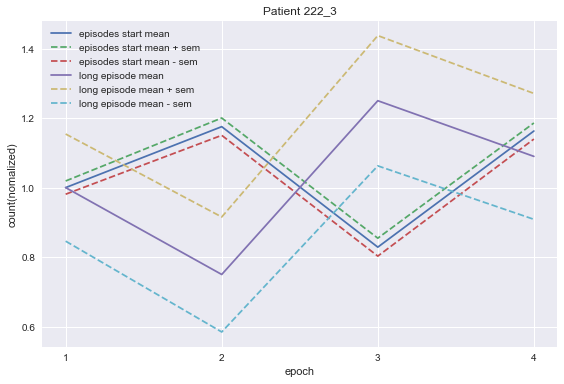

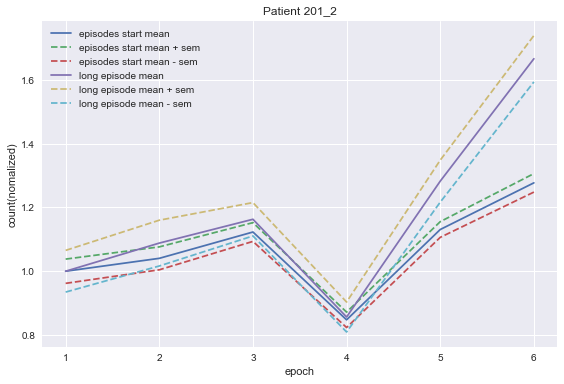

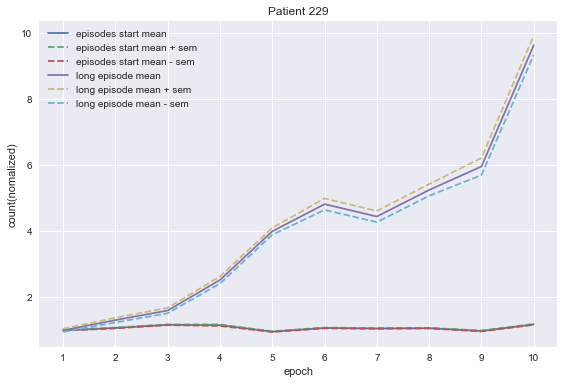

In [4]:
plot_epoch_mean(pat_list)

In [5]:
def report_count(pat_list):
    df_num = pd.DataFrame([], columns = ['patient_id','label', 'number'])
    tf = [True, False]
    i = 0
    for pat in pat_list:
        data = pat.features
        for lab in tf: 
                df_num.loc[i,'patient_id'] = pat.id
                df_num.loc[i,'label'] = lab
                df_num.loc[i,'number'] = np.array(data.loc[data.loc[:,'label'] == lab]).shape[0]
                i += 1
    print(df_num)
    print(pd.DataFrame(df_num.groupby('patient_id').agg('sum').loc[:,'number']))
    #print(pd.DataFrame(df_num.groupby(['patient_id', 'label']).agg('sum').loc[:,'number']))


In [9]:
pat_list_count = [p229, p201_2, p231, p222_1, p222_2, p222_3]
report_count(pat_list_count)

   patient_id  label number
0         229   True     32
1         229  False     15
2       201_2   True     35
3       201_2  False     29
4         231   True    537
5         231  False    356
6       222_1   True    276
7       222_1  False    452
8       222_2   True    265
9       222_2  False    359
10      222_3   True    185
11      222_3  False    182
            number
patient_id        
201_2           64
222_1          728
222_2          624
222_3          367
229             47
231            893
